In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [16]:
# Load the Iris dataset
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
#Basic data prepocessing
# Create a DataFrame with the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target



In [12]:
# Check for missing values
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [13]:
# Check the first few rows of the dataset
print(df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


([<matplotlib.patches.Wedge at 0x7fe9bbca4d90>,
 [Text(0.5499999702695115, 0.9526279613277875, '0'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '2')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

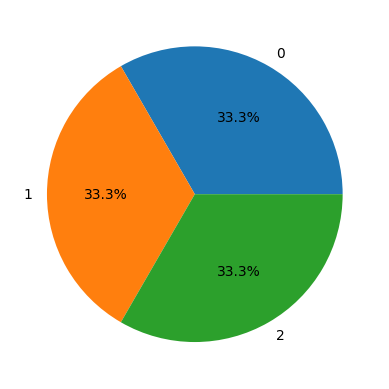

In [12]:
# Visualize the distribution of each feature
p = df['target'].value_counts()
plt.pie(p, labels=p.index, autopct='%1.1f%%')



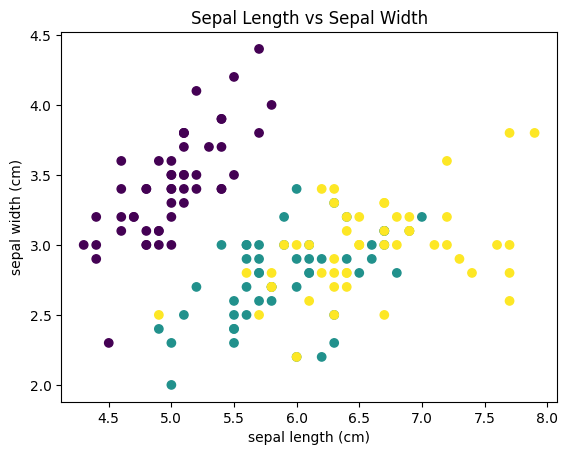

In [14]:
# Visualize the scatter plot of features
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()


In [7]:
from sklearn.cluster import KMeans

# Select the features for clustering
X = df.iloc[:, :4]

# Initialize the K-means model with 3 clusters (as we have 3 classes in the Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-means model to the data
kmeans.fit(X)

# Get the cluster labels
kmeans_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Hierarchical Clustering model with 3 clusters
hc = AgglomerativeClustering(n_clusters=3)

# Fit the Hierarchical Clustering model to the data
hc_labels = hc.fit_predict(X)


In [9]:
from sklearn.metrics import adjusted_rand_score

# Evaluate K-means clustering
kmeans_score = adjusted_rand_score(df['target'], kmeans_labels)

# Evaluate Hierarchical Clustering
hc_score = adjusted_rand_score(df['target'], hc_labels)

print("K-means Clustering Score:", kmeans_score)
print("Hierarchical Clustering Score:", hc_score)


K-means Clustering Score: 0.7302382722834697
Hierarchical Clustering Score: 0.7311985567707746


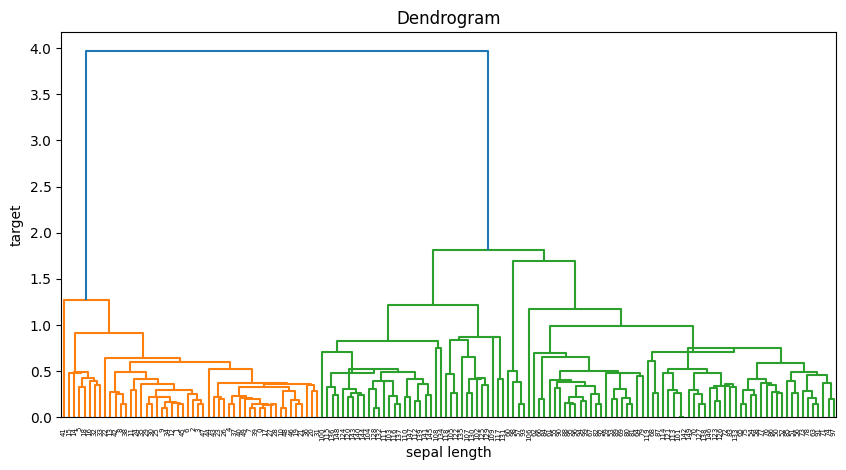

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='centroid')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('sepal length')
plt.ylabel('target')
plt.title('Dendrogram')
plt.show()


In [10]:
from sklearn.decomposition import PCA
# Initialize the PCA model with the number of components desired (let's choose 2 for visualization)
pca = PCA(n_components=2)

# Apply PCA to the data
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = iris.target

# Check the first few rows of the PCA results
print(df_pca.head())

        PC1       PC2  target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


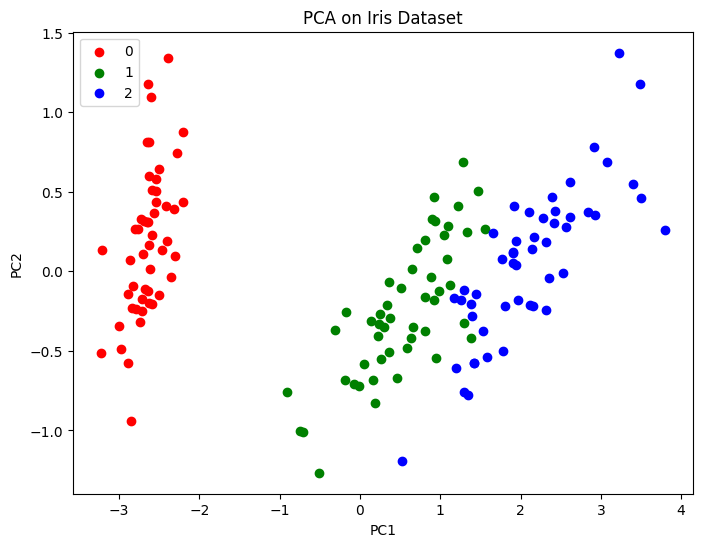

In [11]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
targets = np.unique(iris.target)
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices = df_pca['target'] == target
    plt.scatter(df_pca.loc[indices, 'PC1'], df_pca.loc[indices, 'PC2'], c=color, label=target)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()